In [37]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [38]:
# Read in file
happiness_df = pd.read_csv('world-happiness-report-2015-2022-cleaned.csv')
happiness_df

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1224,141,142,Botswana*,-,"3,471","1,503","0,815","0,280","0,571","0,102","0,012",2022
1225,142,143,Rwanda*,-,"3,268","0,785","0,133","0,462","0,621","0,544","0,187",2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,"2,995","0,947","0,690","0,270","0,329","0,105","0,106",2022
1227,144,145,Lebanon,Middle East and Northern Africa,"2,955","1,392","0,498","0,631","0,103","0,034","0,082",2022


In [39]:
# Removing all regions marked with no value "-"  -Tye
happiness_df.drop(happiness_df[happiness_df['Region'] == "-"].index, inplace = True)

In [40]:
#Converting Happiness Score to Float as some data contains (,) versus (.) as a decimal.-Tye
happiness_df["Happiness Score"] = happiness_df["Happiness Score"].str.replace(',','.').astype(float)

In [41]:
happiness_df.dtypes

Unnamed: 0                         int64
Happiness Rank                     int64
Country                           object
Region                            object
Happiness Score                  float64
Economy (GDP per Capita)          object
Family (Social Support)           object
Health (Life Expectancy)          object
Freedom                           object
Trust (Government Corruption)     object
Generosity                        object
Year                               int64
dtype: object

In [42]:
#complete data cleaning steps 

happiness_df.count()

Unnamed: 0                       1183
Happiness Rank                   1183
Country                          1183
Region                           1183
Happiness Score                  1183
Economy (GDP per Capita)         1183
Family (Social Support)          1183
Health (Life Expectancy)         1183
Freedom                          1183
Trust (Government Corruption)    1183
Generosity                       1183
Year                             1183
dtype: int64

In [43]:
#Unique Number of countries in our data -Tye
total_countries = len(happiness_df['Country'].unique())
print(f'Number of total countries in the data set: {total_countries}')

Number of total countries in the data set: 169


In [44]:
#Unique Number of countries in our data -Tye
total_Regions = len(happiness_df['Region'].unique())
print(f'Number of total regions in the data set: {total_Regions}')

Number of total regions in the data set: 16


In [45]:
#Unique Values by column -Tye
happiness_df.nunique()


Unnamed: 0                        158
Happiness Rank                    158
Country                           169
Region                             16
Happiness Score                  1062
Economy (GDP per Capita)         1115
Family (Social Support)          1092
Health (Life Expectancy)         1040
Freedom                          1018
Trust (Government Corruption)     923
Generosity                        951
Year                                8
dtype: int64

**Understanding the Data:**
Our date consists of 195 countries, 17 regions, and over the course of 8 years. We need to be careful with this data as we can see that all factors being tested for happiness are not equal. This means most likely some countries were not able to be evaluated by one of the variables of happiness, or as we have seen in our data that 2015 data was stored using "." in the data, while more recent years (2022) use "," to configure theirt data. This returns a higher unique number in these columns.
-Tye

In [46]:
#Region Names -Tye
Region_Names= happiness_df.Region.unique()
print(Region_Names)

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia' 'North America and ANZ'
 'Middle East and North Africa' 'East Asia' 'Southeast Asia'
 'Commonwealth of Independent States' 'South Asia']


In [47]:
Region = happiness_df.set_index(["Region"]).groupby(["Region"])
Region

In [48]:
# Data Frame created to analyse year over year Happiness Rank by Region
rank_2015 = happiness_df[happiness_df['Year'] == 2015].groupby(happiness_df.Region).mean()["Happiness Rank"]
rank_2016 = happiness_df[happiness_df["Year"] == 2016].groupby(happiness_df.Region).mean()["Happiness Rank"]
rank_2017 = happiness_df[happiness_df["Year"] == 2017].groupby(happiness_df.Region).mean()["Happiness Rank"]
rank_2018 = happiness_df[happiness_df["Year"] == 2018].groupby(happiness_df.Region).mean()["Happiness Rank"]
rank_2019= happiness_df[happiness_df["Year"] == 2019].groupby(happiness_df.Region).mean()["Happiness Rank"]
rank_2020= happiness_df[happiness_df["Year"] == 2020].groupby(happiness_df.Region).mean()["Happiness Rank"]
rank_2021= happiness_df[happiness_df["Year"] == 2021].groupby(happiness_df.Region).mean()["Happiness Rank"]
rank_2022= happiness_df[happiness_df["Year"] == 2022].groupby(happiness_df.Region).mean()["Happiness Rank"]
Region_by_year_mean = pd.DataFrame({"2015":rank_2015, "2016":rank_2016, 
                                     "2017":rank_2017, "2018":rank_2018, "2019":rank_2019, "2020":rank_2020,"2021":rank_2021,"2022":rank_2022})
Region_by_year_mean.index.name = "Region"


Region_by_year_mean[["2015","2016","2017","2018","2019","2020","2021","2022"]] = Region_by_year_mean[["2015","2016","2017","2018","2019","2020","2021","2022"]].applymap("{:.2f}".format)

Region_by_year_mean

C:\Users\ntyle\AppData\Local\Temp\ipykernel_20860\556511397.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rank_2015 = happiness_df[happiness_df['Year'] == 2015].groupby(happiness_df.Region).mean()["Happiness Rank"]
C:\Users\ntyle\AppData\Local\Temp\ipykernel_20860\556511397.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rank_2016 = happiness_df[happiness_df["Year"] == 2016].groupby(happiness_df.Region).mean()["Happiness Rank"]
C:\Users\ntyle\AppData\Local\Temp\ipykernel_20860\556511397.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future versi

,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,
Australia and New Zealand,9.50,8.50,9.00,9.00,9.50,nan,nan,11.00
Central and Eastern Europe,79.00,78.45,75.07,74.97,70.50,58.29,53.24,58.42
Commonwealth of Independent States,nan,nan,nan,nan,nan,82.58,78.25,nan
East Asia,nan,nan,nan,nan,nan,66.83,62.17,nan
Eastern Asia,64.50,67.17,71.25,65.50,64.83,nan,nan,63.25
Latin America and Caribbean,46.91,48.33,50.81,51.25,52.00,52.38,56.65,56.89
Middle East and North Africa,nan,nan,nan,nan,nan,89.12,90.00,nan
Middle East and Northern Africa,77.60,78.11,76.42,84.28,84.89,nan,nan,87.08
North America,10.00,9.50,10.50,12.50,14.00,nan,nan,15.50


**Note:** Year over year mean rank by region (2015-2022)
Western Europe & Australia/New Zealand consistantly rank among the happiest regions in the world through the data time (2015-2022). Follwoing the beginning of the Covid-19 Pandemic Western Europe has consistantly been the happiest region, as Southern Asia is amongst the worst with a median 118.0 rank out of 169 countries evaluated. -Tye

In [49]:
# DataFrame Analysing the median Happiness Score by world region -Tye
score_2015 = happiness_df[happiness_df['Year'] == 2015].groupby(happiness_df.Region).mean()["Happiness Score"]
score_2016 = happiness_df[happiness_df["Year"] == 2016].groupby(happiness_df.Region).mean()["Happiness Score"]
score_2017 = happiness_df[happiness_df["Year"] == 2017].groupby(happiness_df.Region).mean()["Happiness Score"]
score_2018 = happiness_df[happiness_df["Year"] == 2018].groupby(happiness_df.Region).mean()["Happiness Score"]
score_2019= happiness_df[happiness_df["Year"] == 2019].groupby(happiness_df.Region).mean()["Happiness Score"]
score_2020= happiness_df[happiness_df["Year"] == 2020].groupby(happiness_df.Region).mean()["Happiness Score"]
score_2021= happiness_df[happiness_df["Year"] == 2021].groupby(happiness_df.Region).mean()["Happiness Score"]
score_2022= happiness_df[happiness_df["Year"] == 2022].groupby(happiness_df.Region).mean()["Happiness Score"]
region_score_by_year_mean = pd.DataFrame({"2015":score_2015, "2016":score_2016, 
                                     "2017":score_2017, "2018":score_2018, "2019":score_2019, "2020":score_2020,"2021":score_2021,"2022":score_2022})
region_score_by_year_mean.index.name = "Region"


region_score_by_year_mean[["2015","2016","2017","2018","2019","2020","2021","2022"]] = region_score_by_year_mean[["2015","2016","2017","2018","2019","2020","2021","2022"]].applymap("{:.2f}".format)

region_score_by_year_mean

C:\Users\ntyle\AppData\Local\Temp\ipykernel_20860\4050093992.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_2015 = happiness_df[happiness_df['Year'] == 2015].groupby(happiness_df.Region).mean()["Happiness Score"]
C:\Users\ntyle\AppData\Local\Temp\ipykernel_20860\4050093992.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  score_2016 = happiness_df[happiness_df["Year"] == 2016].groupby(happiness_df.Region).mean()["Happiness Score"]
C:\Users\ntyle\AppData\Local\Temp\ipykernel_20860\4050093992.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a futur

,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,
Australia and New Zealand,7.29,7.32,7.30,7.30,7.27,nan,nan,7.18
Central and Eastern Europe,5.33,5.37,5.41,5.46,5.57,5.88,5.98,5.90
Commonwealth of Independent States,nan,nan,nan,nan,nan,5.36,5.47,nan
East Asia,nan,nan,nan,nan,nan,5.71,5.81,nan
Eastern Asia,5.63,5.62,5.50,5.67,5.69,nan,nan,5.83
Latin America and Caribbean,6.14,6.10,5.96,5.94,5.94,5.98,5.91,5.93
Middle East and North Africa,nan,nan,nan,nan,nan,5.23,5.22,nan
Middle East and Northern Africa,5.41,5.39,5.37,5.20,5.24,nan,nan,5.21
North America,7.27,7.25,7.15,7.11,7.08,nan,nan,7.00


The Analysis of Happiness Score shows Australia/New Zealand and Western Europe not only with the highest score, but one of the most consistant. The happiness score of North America has declined year over year since 2015, with it being the 2nd highest world region in 2022. - Tye

In [50]:
#Statistical Analysis of World Region by Happiness Rank -Tye
region_statistics_df = happiness_df.groupby('Region')
Mean = region_statistics_df['Happiness Rank'].mean()
Median = region_statistics_df['Happiness Rank'].median()
Variance = region_statistics_df['Happiness Rank'].var()
Standard_Deviation = region_statistics_df['Happiness Rank'].std()
Standard_Error_Of_Mean = region_statistics_df['Happiness Rank'].sem()

summary_statistics_df = pd.DataFrame({
    'Mean': Mean,
    'Median': Median,
    'Variance': Variance,
    'Standard deviation': Standard_Deviation,
    'SEM': Standard_Error_Of_Mean
})
# Present Summary Statistics
print('Method I')
summary_statistics_df

Method I


,Mean,Median,Variance,Standard deviation,SEM
Region,,,,,
Australia and New Zealand,9.416667,9.5,1.719697,1.311372,0.378561
Central and Eastern Europe,70.242574,67.5,737.637382,27.159481,1.910934
Commonwealth of Independent States,80.416667,75.5,564.688406,23.763173,4.850637
East Asia,64.500000,66.0,471.727273,21.719283,6.269817
Eastern Asia,65.937500,63.5,449.995968,21.213108,3.749983
Latin America and Caribbean,51.692771,45.0,830.008069,28.809861,2.236079
Middle East and North Africa,89.558824,107.5,1869.223708,43.234520,7.414659
Middle East and Northern Africa,81.018519,86.5,1759.644514,41.948117,4.036459
North America,12.000000,13.5,24.363636,4.935953,1.424887


Statistical Analysis shows the happiest region in the world is Australia/New Zealand across every statistical measure, while Sub-Saharan Africa are one of the least happy by rank. -Tye

In [51]:
#create dataframe for data grouped by region - Tyler
regions_df = pd.DataFrame(happiness_df)
regions_df = regions_df.drop(columns=["Country", "Happiness Score", "Happiness Rank"])
regions_df["Economy (GDP per Capita)"] = regions_df["Economy (GDP per Capita)"].str.replace(",",".").astype(float)
regions_df["Family (Social Support)"] = regions_df["Family (Social Support)"].str.replace(',','.').astype(float)
regions_df["Freedom"] = regions_df["Freedom"].str.replace(',','.').astype(float)
regions_df["Generosity"] = regions_df["Generosity"].str.replace(',','.').astype(float)
regions_df["Health (Life Expectancy)"] = regions_df["Health (Life Expectancy)"].str.replace(',','.').astype(float)
regions_df["Trust (Government Corruption)"] = regions_df["Trust (Government Corruption)"].str.replace(',','.').astype(float)

In [52]:
regions_df_2 = regions_df.set_index(["Region"]).groupby(["Region"])
mean_GDP_score = regions_df_2["Economy (GDP per Capita)"].mean()
mean_family_score = regions_df_2["Family (Social Support)"].mean()
mean_freedom_score = regions_df_2["Freedom"].mean()
mean_generosity_score = regions_df_2["Generosity"].mean()
mean_health_score = regions_df_2["Health (Life Expectancy)"].mean()
mean_trust_score = regions_df_2["Trust (Government Corruption)"].mean()

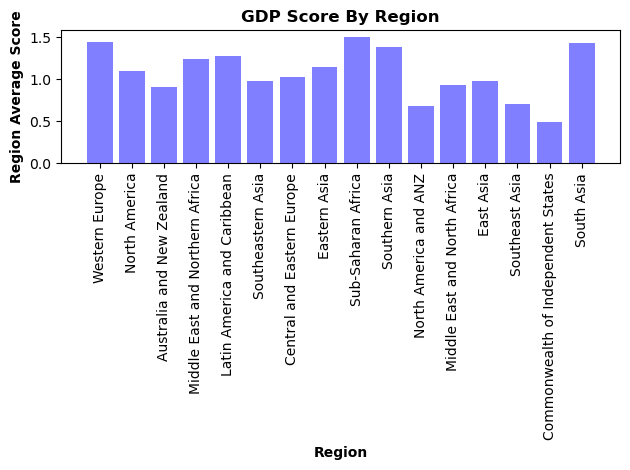

In [53]:
x_axis = np.arange(len(Region_Names))

gdp_graph = plt.bar(x=x_axis, height=mean_GDP_score, color="blue", alpha=0.5, width=0.8)
plt.xticks(x_axis, Region_Names, rotation="vertical")
plt.xlabel("Region", fontweight="bold")
plt.ylabel("Region Average Score", fontweight="bold")
plt.title("GDP Score By Region", fontweight="bold")
plt.tight_layout()
plt.savefig("Graphs/gdp_score_graph.png")
# plt.close()

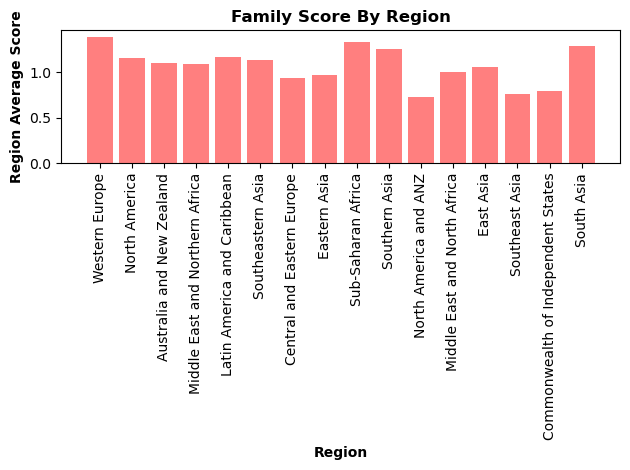

In [54]:
family_graph = plt.bar(x=x_axis, height=mean_family_score, color="red", alpha=0.5, width=0.8)
plt.xticks(x_axis, Region_Names, rotation="vertical")
plt.xlabel("Region", fontweight="bold")
plt.ylabel("Region Average Score", fontweight="bold")
plt.title("Family Score By Region", fontweight="bold")
plt.tight_layout()
plt.savefig("Graphs/family_score_graph.png")
# plt.close()

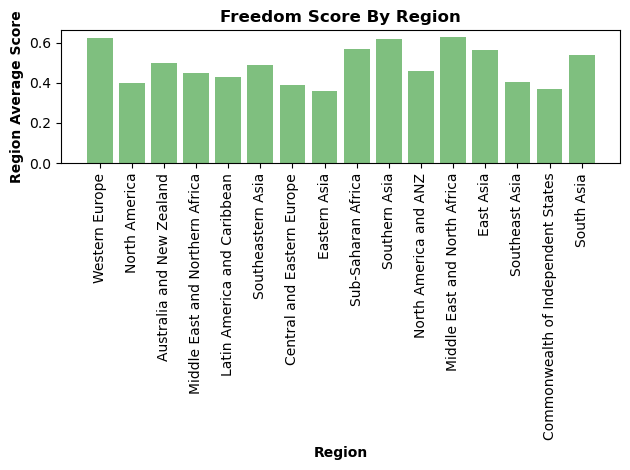

In [55]:
freedom_graph = plt.bar(x=x_axis, height=mean_freedom_score, color="green", alpha=0.5, width=0.8)
plt.xticks(x_axis, Region_Names, rotation="vertical")
plt.xlabel("Region", fontweight="bold")
plt.ylabel("Region Average Score", fontweight="bold")
plt.title("Freedom Score By Region", fontweight="bold")
plt.tight_layout()
plt.savefig("Graphs/freedom_score_graph.png")
# plt.close()

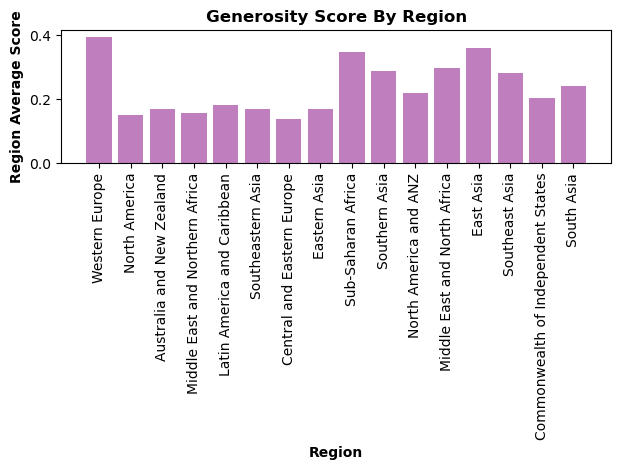

In [56]:
generosity_graph = plt.bar(x=x_axis, height=mean_generosity_score, color="purple", alpha=0.5, width=0.8)
plt.xticks(x_axis, Region_Names, rotation="vertical")
plt.xlabel("Region", fontweight="bold")
plt.ylabel("Region Average Score", fontweight="bold")
plt.title("Generosity Score By Region", fontweight="bold")
plt.tight_layout()
plt.savefig("Graphs/generosity_score_graph.png")
# plt.close()

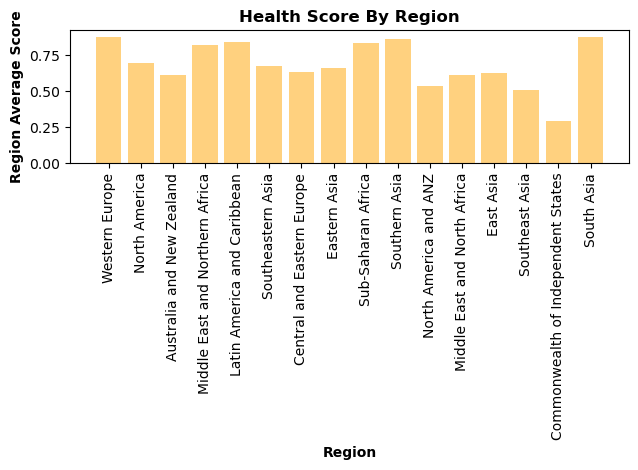

In [57]:
health_graph = plt.bar(x=x_axis, height=mean_health_score, color="orange", alpha=0.5, width=0.8)
plt.xticks(x_axis, Region_Names, rotation="vertical")
plt.xlabel("Region", fontweight="bold")
plt.ylabel("Region Average Score", fontweight="bold")
plt.title("Health Score By Region", fontweight="bold")
plt.tight_layout()
plt.savefig("Graphs/health_score_graph.png")
# plt.close()

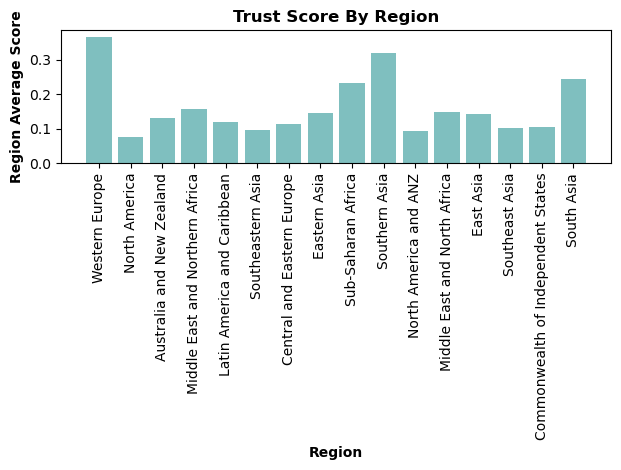

In [58]:
trust_graph = plt.bar(x=x_axis, height=mean_trust_score, color="teal", alpha=0.5, width=0.8)
plt.xticks(x_axis, Region_Names, rotation="vertical")
plt.xlabel("Region", fontweight="bold")
plt.ylabel("Region Average Score", fontweight="bold")
plt.title("Trust Score By Region", fontweight="bold")
plt.tight_layout()
plt.savefig("Graphs/trust_score_graph.png")
# plt.close()